# Exploratory Data Analysis of Chicago Divvy Bicycle Sharing

![](https://imgur.com/VCrOoL6.png)



Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

In this project we will perform Explanatory Data Analysis on Chicago Divvy Bicycle Sharing dataset.Dataset that we are going to use in the project is from Kaggle

- Divvy is the bicycle sharing system in the Chicago metropolitan area.
- This dataset contains the details of bicycle sharing from year 2013 to year 2017.
- This data set contains more than 9 million rows with 23 columns of bicycle trips

In this project we are going to use Numpy, Pandas, Matplotlib, Seaborn, Plotly, opendatasets libraries of Python.

Here is the outline of the project:

  1. Download the Data
  2. Data Preparation and Cleaning
  3. Exploratory Analysis and Visualization
  4. Ask & Answer Questions
  5. Summary
  6. Conclusion
  7. Future Work 
  8. References
 

#### Install and Import all required Libraries

In [1]:
!pip install opendatasets --upgrade --quiet
!pip install  matplotlib==3.1.3 seaborn --upgrade --quiet
!pip install plotly --quiet
!pip install matplotlib --quiet
!pip install folium --quiet
!pip install numpy pandas --quiet
!pip install wordcloud --quiet

     |████████████████████████████████| 13.1 MB 14.7 MB/s 
     |████████████████████████████████| 288 kB 77.8 MB/s 


Let's import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
from wordcloud import WordCloud
%matplotlib inline

## Download the Data
We will use opendatasets library for downloading the data.The dataset has been downloaded from kaggle using the kaggle account username and API keys.


In [ ]:
import opendatasets as od

download_url ='https://www.kaggle.com/datasets/yingwurenjian/chicago-divvy-bicycle-sharing-data'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

In [ ]:
data_filename = './chicago-divvy-bicycle-sharing-data/data.csv'

In [ ]:
trip_df = pd.read_csv(data_filename)

In [ ]:
trip_df.sample(100)

## Data Preparation and Cleaning

In [ ]:
trip_df.shape

As this dataframe has 9M rows. So, it needs high Ram and disk storage to process it. So, we fetch 200k random rows for our analysis with sample() function. If you have enough resources then you can skip this code and can apply analysis to complete dataframe.

In [ ]:
data_df = trip_df.sample(200000)

In [ ]:
data_df.columns

In [ ]:
data_df.info()

In [ ]:
data_df.describe()

In [ ]:

missing_value = data_df.isna().sum().sort_values(ascending=False)
missing_value

Dataset is Clean. There is no missing or null present in the dataset.

Lets check for the duplicate data 

In [ ]:
data_df.duplicated().sum()

There are 47 duplicated row present in the dataset.Lets drop that duplicated row using 'drop_duplicates' method of pandas

In [ ]:
data_df.drop_duplicates()

We delected the duplicated rows present in the Dataset.

## Exploratory Analysis and Visualization

The data analysis helps us to understand the situation deeply, by digging into the data we can tell the hidden stories. Meanwhile, data visualization empowers us to communicate stories more effectively.

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive.

Lets analysze few columns:

   1. UserType
   2. Year
   3.Gender
   4.Event
   5.Temperature
   6.from_station_name
   7.Day


1. UserType

In [ ]:
data_by_usertype = data_df.usertype.value_counts()
plt.figure(figsize=(6,5))
plt.xlabel('Bicycle User Types')
plt.ylabel('Number of Users')
sns.barplot( x= data_by_usertype.index,y=data_by_usertype).set_title("Count of Usertype");

- According to this graph, the majority of users (99%) are subscribers, while the number of customer and dependent users is significantly lower.

2. Year

In [ ]:
data_by_year = data_df.year.value_counts()
plt.bar(data_by_year.index, data_by_year)
plt.xlabel('Year')
plt.ylabel('Count of rides')
plt.title("Number of riders per year", fontsize =15);

- This dataset contains records for bicycle trips taken between 2014 to 2017. The number of users has increased every year, with the number of riders  approximatly doubled from 2014 to 2017.

3. Gender

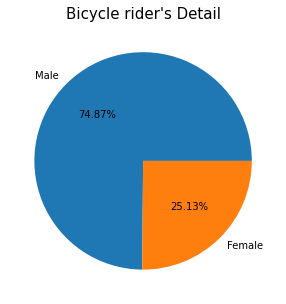

In [24]:
data_by_gender= data_df.gender.value_counts()
plt.figure(figsize= (10,5))
plt.title("Bicycle rider's Detail", fontsize =15)
plt.pie(data_by_gender,labels =data_by_gender.index ,autopct = "%0.2f%%");

- According to above graph, approximately 75% of the bicycle riders are male, while only 25% are female.

4. Event

In [25]:
data_df.events.value_counts()

cloudy          176958
clear            10721
rain or snow      9099
not clear         1841
tstorms           1370
unknown             11
Name: events, dtype: int64

 5. Temperature

In [28]:
data_df.temperature.value_counts().head(20)
fig = px.violin(data_df,y ='temperature',title ='Temperature vs No.of trips')
fig.update_layout(yaxis_title ='Temperature',xaxis_title = 'Number of Trips')
fig.show()

In the above graph we can see that temperature is mainly preferred around 70F-85F 

6. from_station_name

In [31]:
station_name = data_df.from_station_name.value_counts().sort_values(ascending=False).head(10)

Let's plot wordcloud for this.

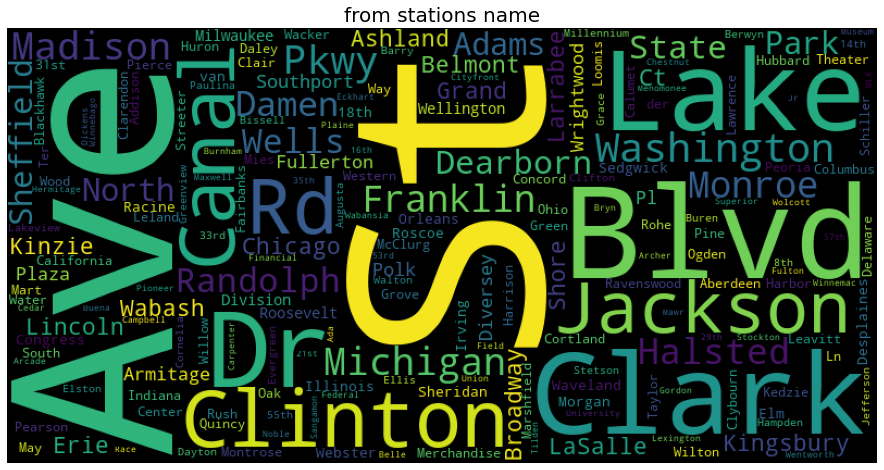

In [32]:
words1 = ' '.join(from_station_name for from_station_name in data_df.from_station_name)
wc1 = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='black').generate(str(words1))
plt.figure(figsize=(40,8))
plt.axis("off")
plt.grid(False)
plt.title('from stations name', fontsize=20)
plt.imshow(wc1);

 - Based on the data presented in the graph, it appears that the Clinton St & Washington Blvd being the most popular stations within that category. It is possible that "St" is a shortened form of "Station." The data suggests that these particular stations are the most popular starting points for bicycle trips.

7. Day

In [33]:
fig= px.histogram(data_df[0:20000], x="day", title='Days of week vs No. for trip') # we have taken only top 20000 row of data.
fig.update_layout(xaxis_title ='Days of week',yaxis_title = 'Number of Trips')
fig.show()

- There are more rides taken on weekdays compared to weekends. Almost 99.9% of members are subscribers, indicating that most riders use the bikes for routine activities like commuting to work or school


## Ask & Answer Questions

### Q1.Which is the most preferred weather for bicycle ride?

In [35]:
data_by_events = data_df.events.value_counts()


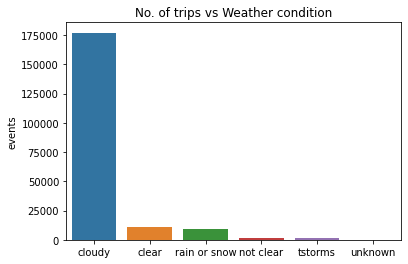

In [36]:
sns.barplot(x= data_by_events.index,y = data_by_events).set_title("No. of trips vs Weather condition");


- The above graph indicates that most bicycle riders prefer to ride in cloudy weather compared to other weather conditions.

### Q2. What are the top 15 most popular stations for rides and the top 15 least popular stations for rides?

To determine the most popular starting station, we should first focus on the data for the `from starting name`

In [40]:
station_df = data_df['from_station_name'].value_counts(ascending= False).head(15).reset_index(name='counts')
station_df.columns = ['from_station_name','Counts']


In [41]:
fig = px.bar(station_df,x='from_station_name', y ='Counts',text_auto =True, title="Most Popular Divvy Bike Stations in Chicago")
fig.update_layout(xaxis_title ='Station',yaxis_title = 'Number of Trips Originating from Station')
fig.show()

To gain insight into the most popular destination stations, it is necessary to analyze the data for the `to station name`

In [42]:
to_station_df = data_df['to_station_name'].value_counts(ascending= False).head(15).reset_index(name='counts')
to_station_df.columns = ['to_station_name','Counts']
to_station_df.head(3)

,to_station_name,Counts
0,Clinton St & Washington Blvd,3374
1,Canal St & Adams St,2912
2,Canal St & Madison St,2662


- From the above graph it is clear the below 3 station are most popular staion in both the cases 'from station name'  & 'to station name'
    - Clinton St & Washington Blvd	
    - Canal St & Adams St	
    - Canal St & Madison St	

 Least Popular Station 


In [43]:
bottom_station_df = data_df['from_station_name'].value_counts(ascending= False).tail(10).reset_index(name='counts')
bottom_station_df.columns = ['from_station_name','Counts']
fig = px.bar(bottom_station_df,x='from_station_name', y ='Counts',text_auto =True, title='Least Popular Divvy Bike Stations in Chicago')
fig.update_layout(xaxis_title ='Station',yaxis_title = 'Number of Trips Originating from Station')            
fig.show()

To gain insight into the least popular destination stations, it is necessary to analyze the data for the `to station name`

In [44]:
to_bottom_station_df = data_df['from_station_name'].value_counts(ascending= False).tail(10).reset_index(name='counts')
to_bottom_station_df.columns = ['from_station_name','Counts']
to_bottom_station_df.head(3)

,from_station_name,Counts
0,Phillips Ave & 79th St,1
1,Halsted St & 59th St,1
2,Ashland Ave & 50th St,1


- From the above graph it is clear the below 3 station are least popular station in both the cases `from station name` & `to station name` which have very few riders
  - Chappel Ave & 79th St
  - May St & 69th St
  - Vernon Ave & 79th St

### Q3. What is the percentage of round-trip bicycle rides?

In [45]:
round_df = (data_df[data_df['from_station_name'] == data_df['to_station_name']])
count_of_roundtrip = len(round_df.index)
print("Total number of round trip :", count_of_roundtrip)

Total number of round trip : 2496


In [46]:
round_trip_per = (round(count_of_roundtrip*100/len(data_df),2))
print('Percentage of round trip is {} %.'.format(round_trip_per))

Percentage of round trip is 1.25 %.


### Q4.What is the most preferred month for long bicycle trips? Please show this using the sunbrust plot?

To ensure that we do not alter the original dataset, it would be a good idea to create a copy of the dataset first.

In [47]:
df_sunburst= data_df.copy()

In [49]:
df_sunburst.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')

First, we will import the `calendar` module in order to convert the numerical representation of months into their corresponding names.

In [50]:
import calendar

In [51]:
df_sunburst['monthName'] = df_sunburst['month'].apply(lambda x: calendar.month_name[x])

In [52]:
df_sun1 = df_sunburst.groupby(['gender','monthName','day']).agg({'tripduration':'mean'}).reset_index()
df_sun1

,gender,monthName,day,tripduration
0,Female,April,0,12.147531
1,Female,April,1,12.183608
2,Female,April,2,11.946116
3,Female,April,3,12.150000
4,Female,April,4,12.034722
...,...,...,...,...
163,Male,September,2,10.820057
164,Male,September,3,10.682738
165,Male,September,4,10.858550
166,Male,September,5,12.163226


To improve the visualization, we will use a sunburst chart. By hovering over the chart, we can see more information. 

In [53]:
fig = px.sunburst(df_sun1,
                  path=['gender','monthName','day'],
                  values ='tripduration',
                  color = 'tripduration',
                  color_continuous_scale = 'RdBu',
                  title = ' longer trips taken by males vs females vary by day'
                   )
fig.update_layout(
    autosize=False,
    height=600,
    width=600)

fig.show()

- The above sunburst plot shows that female riders tend to take more long rides during the summer months of June and July. 
- Riders do not seem to prefer the winter months of December and January. 
- Additionally, the plot indicates that riders prefer to take long trips on weekends compared to weekdays.

### Q5. What are the most popular Divvy bicycle routes?

To get the most popular routes , we will group `from_station_name` and `to_station_name`. We will drop duplicates rows, if any

In [55]:
route_df =data_df.groupby(['from_station_name','to_station_name']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset="to_station_name")
route_df['trip'] = route_df['from_station_name']+ ' to '+ route_df['to_station_name']


In [57]:
fig = px.bar(route_df[0:15],x='trip', y ='count',text_auto =True, title='Top 15 Most Popular Divvy Bike Routes in Chicago')
fig.update_layout(xaxis_title ='Station Routes',yaxis_title = 'Frequency')
              
fig.show()

- Most popular stations route is "Columus Dr & Randolph St" to "Canal st & Madison st". Lets visualise this in the map


In [58]:
import folium
from folium import plugins
most_popular_route = folium.Map(location=[48.3794,-87.623177],zoom_start=15,center = [41.882091,-87.639474])
route_lats_longs = [[41.882091,-87.639474	],[41.883893,-87.624649]]
# Ploting ant-route
plugins.AntPath(route_lats_longs).add_to(most_popular_route)
most_popular_route

- According to this information, the distance between the Columbus Dr & Randolph St and Canal St & Madison St stations is approximately 0.9 miles, which would take about 5 minutes to travel by bicycle. This suggests that the most common rides are those that take between 5 and 10 minutes.

### Q6. In which part of Chicago most bicycle riders are riding ?

In [59]:
import folium
from folium.plugins import HeatMap
lat_lon_pair=list(zip(list(data_df.latitude_start),list(data_df.longitude_start)))

In [60]:
map=folium.Map(location=[48.3794,-87.623177],zoom_start=12, center = [41.8781136,-87.623177])
HeatMap(lat_lon_pair[0:25000]).add_to(map)
map

- In the above map we have provided the latitude and longitutde of the station where rides starts.
- From the map, we can see that the most of the bicycle rides are taken on North part of the chicago.
- The number of rides is higher near the coast compared to the central area.

### Q7.How many station location are present in the chicago. Plot them  on the chicago map?

In [61]:
len(data_df['from_station_name'].unique())

630

It seems that there are 656 Divvy stations in the city of Chicago. 

In [62]:
map_df = data_df[['from_station_name','latitude_start','longitude_start']].drop_duplicates(subset='from_station_name')

In [63]:
map=folium.Map(location=[48.3794,-87.623177],zoom_start=13,center = [41.8781136,-87.623177])
for index, row in map_df.iterrows():
    folium.Marker(location=[row["latitude_start"], row["longitude_start"]],popup = row['from_station_name']).add_to(map)

map

- In the above map we have marked the  station on the geographical map.
- From the map we can see that the number of station density is higher in the cental part of the chicago.


### Q8.Find out Trips (Year/Month)

In [73]:
trip_month_df = data_df.groupby(['year','month']).size().reset_index(name = 'trips')

In [65]:
trip_month = trip_month_df.pivot('month','year','trips')

In [66]:
fig = px.imshow(trip_month,text_auto=True,width = 500,height=1000,
                labels=dict(x="year", y="month", color="No. of trips"),
                color_continuous_scale='RdBu_r',
                title = ' Number of trips taken per year per month')

fig.show()

 - The above figure indicates that riders are opting for bicycle rides. The number of rides has approximately doubled from 2014 to 2017. The most popular months for bicycle rides are June through September.




### Q9.What is the most frequent trip duration for bicycle ride?

In [67]:
fig = px.histogram(data_df[:10000],x='tripduration',color = 'gender',title = ' Most frequent trip duration')
fig.show()

- The graph shows that the most common trips are those that last between 5 and 10 minutes.

### Q9.What is the most preferred time for bicycle ride?

In [68]:
trip_df1 = data_df.groupby(['hour','gender'])['tripduration'].count().reset_index(name='counts')


In [69]:
fig= px.bar(trip_df1,
            y= 'counts',
            x='hour', 
            color = 'gender',
             barmode ='group'
            )
fig.show()

- Based on the graph, the busiest times for bicycle rides are in the morning from 7am to 9am and in the evening from 4pm to 6pm.

### Q10 In which month of the year the maximum number of rides taken?

In [71]:
trip_df2 = data_df.groupby(['month'])['tripduration'].count().reset_index(name='counts')
trip_df2['month'] = trip_df2['month'].apply(lambda x: calendar.month_name[x])


In [72]:
fig= px.bar(trip_df2, y= 'counts', x= 'month', title='Monthly count of trips',text_auto=True)
fig.show()

- July as the most popular month for the bicycle riders has over 40 times greater number of rides compared to January as the least popular month. In fact, during the winter months, the number of rides  is very low and neglible.



## Summary and Conclusion
Data Analysis doesn't stop here. We could analyze more aspects of our bicycle sharing dataset. However, everything comes to and end. I hereby conclude that,

- We have seen how to download datasets from kaggle.
- Processing, deleting and creating new dataframes using Pandas
- Handling duplicated data
- Visualization using Matplotlib, Seaborn and Plotly.

Conclusion:
 - The peak hour for bicycle ride is morning 7am to 9am and evening 4pm to 6pm. indicating that most riders use the bikes for routine activities like commuting to work.

 - According to this graph, the majority of users (99%) are subscribers, while the number of customer and dependent users is significantly lower.

 - There are more rides taken on weekdays compared to weekends. Almost 99.9% of members are subscribers, indicating that most riders use the bikes for routine activities like commuting to work, whereas weekend seems to be leisure-oriented usage. 
 
 - Riders tend to prefer taking short, 5-10 minute bicycle rides.

 - July as the most popular month for the bicycle riders has over 40 times greater number of rides compared to January as the least popular month,the reason may be the pleasent weather condition suitable for bicycle rides. In fact, during the winter months, the number of rides  is very low and neglible.
 
 



## Future Work 

- We can do more detailed analysis of the dataset adding population data & some other dataset to get more insights.
- We can analysis number of bicycle avalaibe for the rider in the station by adding no. of bicycle after every trip of avalaible.
- We can analyze longitude, lattitude of start point, end point to see the common paths for different routes.
- This dataset contains the details of bicycle sharing from year 2013 to year 2017.In future we can also add the recent years trip data and perform EDA.

## References

* Sunburst charts https://plotly.com/python/sunburst-charts/
* Tutorial by Jovian https://jovian.ai/aakashns-6l3/us-accidents-analysis
- Pandas Documentation https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- Matplotlib https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html

- Plotly https://plotly.com/python/sunburst-charts/